In [1]:
!which python
!python --version

import warnings
warnings.filterwarnings("ignore")

/usr/local/bin/python
Python 3.10.12


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
pip install rgf_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.8/757.8 kB 10.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import csv
import copy
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
import sklearn
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
from sklearn.metrics import mean_squared_error as mse


In [5]:
data = pd.read_csv("/content/drive/My Drive/Water_split/Tol_screened_ensemble_final.csv")
data

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Cubic,Tetra,Ortho,Hex,PBE,HSE,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1)
0,0,0,0,RbGe0.625Sn0.250Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.136648,0.047374,2.112412
1,1,1,1,RbGe0.625Sn0.375Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.207158,-0.042562,1.606548
2,2,2,2,RbGe0.625Pb0.125Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.143533,0.031932,1.920846
3,3,3,3,RbGe0.625Pb0.125Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.183948,-0.025908,1.564668
4,4,4,4,RbGe0.625Pb0.250Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.168341,-0.010930,1.560484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67911,67911,67911,67911,CsBa0.375Ca0.125Ge0.375Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.13,...,0,0,0,1,0,1,0,-0.094719,0.002251,3.967263
67912,67912,67912,67912,CsBa0.375Ca0.125Ge0.375Pb0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.13,...,0,0,0,1,0,1,0,-0.082060,0.000605,4.127859
67913,67913,67913,67913,CsBa0.375Ca0.125Ge0.500Cl3,0.0,0.0,1.0,0.0,0.0,0.13,...,0,0,0,1,0,1,0,-0.120669,-0.010707,4.301520
67914,67914,67914,67914,CsBa0.375Ca0.250Ge0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.25,...,0,0,0,1,0,1,0,-0.097974,-0.003121,4.594275


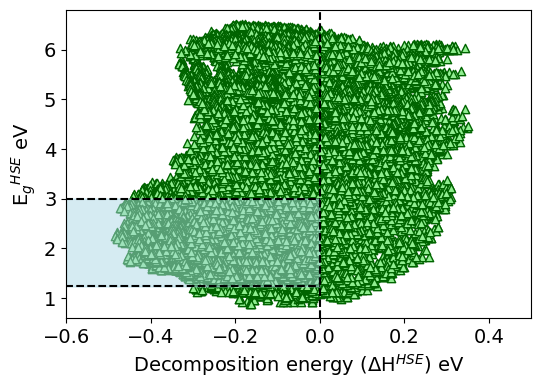

In [6]:
plt.figure(figsize=(6, 4))
plt.rc('font', family='sans-serif', size=14)

# Plotting with triangle markers ('^') and dark blue color ('darkblue')
plt.scatter(data['Decomp(HSE)'], data['Band gap(HSE-mf1)'], marker='^', color='lightgreen', edgecolor='darkgreen')

# Adding labels and title
plt.xlabel('Decomposition energy ($\Delta$H$^{HSE}$) eV')  # X-axis label
plt.ylabel('E$_g$$^{HSE}$ eV')  # Y-axis label
# ax.set_title('Scatter Plot with Triangle Markers')  # Plot title
# ax.legend()  # Show legend
plt.axvline(x=0, color='k', linestyle='--', linewidth=1.5)

# Adding horizontal lines at y=1.23 and y=3
plt.hlines(y=1.23, color='k',xmin = -1.7, xmax=0, linestyle='--', linewidth=1.5)
plt.hlines(y=3, color='k', xmin=-1.7, xmax=0, linestyle='--', linewidth=1.5)
plt.xlim([-0.6, 0.5])
x = np.linspace(-0.6, 0.5, 1000)  # Generate x values
y1 = np.full_like(x, 1.23)  # Constant value for lower bound
y2 = np.full_like(x, 3)  # Constant value for upper bound
plt.fill_between(x, y1, y2, where=(x<0), color='lightblue', alpha=0.5)  # Fill with very light blue

# # Display the plot
plt.show()

In [7]:
neg_decomp = []
for i in range(0, len(data.index)):
  if data.loc[i, "Decomp(HSE)"] < 0.1:
    neg_decomp.append(data.loc[i, "Index"])
data_scr1 = data.iloc[neg_decomp]
data_scr1.reset_index(drop=True, inplace=True)
data_scr1["Index"] = data_scr1.index
data_scr1

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Cubic,Tetra,Ortho,Hex,PBE,HSE,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1)
0,0,0,0,RbGe0.625Sn0.250Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.136648,0.047374,2.112412
1,1,1,1,RbGe0.625Sn0.375Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.207158,-0.042562,1.606548
2,2,2,2,RbGe0.625Pb0.125Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.143533,0.031932,1.920846
3,3,3,3,RbGe0.625Pb0.125Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.183948,-0.025908,1.564668
4,4,4,4,RbGe0.625Pb0.250Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.00,...,1,0,0,0,0,1,0,-0.168341,-0.010930,1.560484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59268,67911,67911,59268,CsBa0.375Ca0.125Ge0.375Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.13,...,0,0,0,1,0,1,0,-0.094719,0.002251,3.967263
59269,67912,67912,59269,CsBa0.375Ca0.125Ge0.375Pb0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.13,...,0,0,0,1,0,1,0,-0.082060,0.000605,4.127859
59270,67913,67913,59270,CsBa0.375Ca0.125Ge0.500Cl3,0.0,0.0,1.0,0.0,0.0,0.13,...,0,0,0,1,0,1,0,-0.120669,-0.010707,4.301520
59271,67914,67914,59271,CsBa0.375Ca0.250Ge0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.25,...,0,0,0,1,0,1,0,-0.097974,-0.003121,4.594275


In [8]:
split_gap = []
for i in range(0, len(data_scr1.index)):
  if data_scr1.loc[i, "Band gap(HSE-mf1)"] > 1.23 and data_scr1.loc[i, "Band gap(HSE-mf1)"] < 2.8:
    split_gap.append(data_scr1.loc[i, "Index"])
data_scr2 = data_scr1.iloc[split_gap]
data_scr2.reset_index(drop=True, inplace=True)
data_scr2["Index"] = data_scr2.index
data_scr2

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Cubic,Tetra,Ortho,Hex,PBE,HSE,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1)
0,0,0,0,RbGe0.625Sn0.250Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,-0.136648,0.047374,2.112412
1,1,1,1,RbGe0.625Sn0.375Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,-0.207158,-0.042562,1.606548
2,2,2,2,RbGe0.625Pb0.125Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,-0.143533,0.031932,1.920846
3,3,3,3,RbGe0.625Pb0.125Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,-0.183948,-0.025908,1.564668
4,4,4,4,RbGe0.625Pb0.250Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,-0.168341,-0.010930,1.560484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23196,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,-0.144763,-0.101726,2.713299
23197,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,-0.198629,-0.103025,2.698493
23198,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,-0.108522,-0.089858,2.382035
23199,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,1,0,-0.112282,-0.115070,2.414528


In [9]:
data_scr2["Band gap(HSE-mf1)"].min()

1.2301696470075008

In [10]:
A_IE = data_scr2["A_IE"]
A_EA = data_scr2["A_EA"]
data_scr2["A_En_mull"] = ((A_IE + A_EA)/2)*0.0103643

B_IE = data_scr2["B_IE"]
B_EA = data_scr2["B_EA"]
data_scr2["B_En_mull"] = ((B_IE + B_EA)/2)*0.0103643

X_IE = data_scr2["X_IE"]
X_EA = data_scr2["X_EA"]
data_scr2["X_En_mull"] = ((X_IE + X_EA)/2)*0.0103643

data_scr2["x(S)"] = (data_scr2["A_En_mull"] * data_scr2["B_En_mull"] * (data_scr2["X_En_mull"]**3))**(1/5)
data_scr2

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,PBE,HSE,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S)
0,0,0,0,RbGe0.625Sn0.250Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.136648,0.047374,2.112412,2.331397,4.178886,8.290922,5.609150
1,1,1,1,RbGe0.625Sn0.375Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.207158,-0.042562,1.606548,2.331397,4.469190,8.290922,5.685003
2,2,2,2,RbGe0.625Pb0.125Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.143533,0.031932,1.920846,2.331397,4.176243,8.290922,5.608440
3,3,3,3,RbGe0.625Pb0.125Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.183948,-0.025908,1.564668,2.331397,4.466495,8.290922,5.684317
4,4,4,4,RbGe0.625Pb0.250Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,-0.168341,-0.010930,1.560484,2.331397,4.463852,8.290922,5.683645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23196,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,-0.144763,-0.101726,2.713299,2.182670,3.902574,8.290922,5.460464
23197,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,-0.198629,-0.103025,2.698493,2.182670,3.941906,8.290922,5.471426
23198,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,-0.108522,-0.089858,2.382035,2.182670,3.978544,7.589259,5.198308
23199,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,-0.112282,-0.115070,2.414528,2.182670,3.975901,7.589259,5.197618


In [11]:
#Band edge
for i in range(0, len(data_scr2.index)):
  data_scr2.loc[i, 'CBM'] = data_scr2.loc[i, 'x(S)'] - 4.44 - (data_scr2.loc[i, 'Band gap(HSE-mf1)'])/2
  data_scr2.loc[i, 'VBM'] = data_scr2.loc[i, 'x(S)'] - 4.44 + (data_scr2.loc[i, 'Band gap(HSE-mf1)'])/2

data_scr2

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM
0,0,0,0,RbGe0.625Sn0.250Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,-0.136648,0.047374,2.112412,2.331397,4.178886,8.290922,5.609150,0.112944,2.225356
1,1,1,1,RbGe0.625Sn0.375Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,-0.207158,-0.042562,1.606548,2.331397,4.469190,8.290922,5.685003,0.441729,2.048277
2,2,2,2,RbGe0.625Pb0.125Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,-0.143533,0.031932,1.920846,2.331397,4.176243,8.290922,5.608440,0.208017,2.128863
3,3,3,3,RbGe0.625Pb0.125Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,-0.183948,-0.025908,1.564668,2.331397,4.466495,8.290922,5.684317,0.461984,2.026651
4,4,4,4,RbGe0.625Pb0.250Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.0,...,0,-0.168341,-0.010930,1.560484,2.331397,4.463852,8.290922,5.683645,0.463402,2.023887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23196,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.144763,-0.101726,2.713299,2.182670,3.902574,8.290922,5.460464,-0.336186,2.377113
23197,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.198629,-0.103025,2.698493,2.182670,3.941906,8.290922,5.471426,-0.317820,2.380673
23198,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.108522,-0.089858,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326
23199,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.112282,-0.115070,2.414528,2.182670,3.975901,7.589259,5.197618,-0.449646,1.964881


In [12]:
# from google.colab import files
# data_scr2.to_csv('data_scr2.csv')
# files.download('data_scr2.csv')

In [13]:
neg_CBM = []
for i in range(0, len(data_scr2.index)):
  if data_scr2.loc[i, 'CBM'] < 0 and data_scr2.loc[i, 'VBM'] > 1.23:
    neg_CBM.append(i)

data_scr3 = data_scr2.iloc[neg_CBM]
data_scr3 = data_scr3.reset_index(drop=True)
data_scr3

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM
0,62,62,60,RbCa0.125Ge0.625Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0,-0.101503,0.085150,2.497572,2.331397,3.922525,8.290922,5.538576,-0.150210,2.347362
1,64,64,62,RbCa0.125Ge0.625Pb0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0,-0.108509,0.081897,2.625616,2.331397,3.919830,8.290922,5.537814,-0.214993,2.410622
2,67,67,65,RbCa0.125Ge0.750Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0,-0.142124,0.057796,2.541526,2.331397,3.956520,8.290922,5.548143,-0.162620,2.378906
3,72,72,69,RbCa0.250Ge0.500Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,0,-0.112035,0.056482,2.501911,2.331397,3.922369,8.290922,5.538532,-0.152424,2.349487
4,74,74,70,RbCa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,0,-0.136831,0.032649,2.431663,2.331397,3.919726,8.290922,5.537785,-0.118046,2.313616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,0,-0.144763,-0.101726,2.713299,2.182670,3.902574,8.290922,5.460464,-0.336186,2.377113
3039,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,0,-0.198629,-0.103025,2.698493,2.182670,3.941906,8.290922,5.471426,-0.317820,2.380673
3040,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,0,-0.108522,-0.089858,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326
3041,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,0,-0.112282,-0.115070,2.414528,2.182670,3.975901,7.589259,5.197618,-0.449646,1.964881


In [14]:
data_scr3["Band gap(HSE-mf1)"].min()

1.5869241247999983

In [15]:
# from google.colab import files
# data_scr1.to_csv('data_scr4.csv')
# files.download('data_scr4.csv')

In [16]:
# rows_org = []
# rows_inorg = []
# for i in range(0, len(data_scr3.index)):
#   if data_scr3.loc[i, 'Cs'] == 1 and data_scr3.loc[i, 'MA'] == 0 and data_scr3.loc[i, 'FA'] == 0:
#     rows_inorg.append(i)

#   else:
#     rows_org.append(i)

# inorg = data_scr3.iloc[rows_inorg]
# org = data_scr3.iloc[rows_org]

# plt.figure(figsize=(6, 4))
# plt.rc('font', family='serif', size=14)
# plt.scatter(inorg['Band gap(HSE-mf1)'], inorg['n_STH(%)'], marker='^', color='lightgreen', edgecolor='darkgreen', label='Inorganic (Cs)')
# plt.scatter(org['Band gap(HSE-mf1)'], org['n_STH(%)'], marker='^', color='red', edgecolor='darkred', label='Organic (FA,MA)')

# plt.xlabel('Band gap (eV)')
# plt.ylabel('$\eta$$_{STH}$ (%)')
# plt.legend()
# plt.grid(True)
# plt.show()

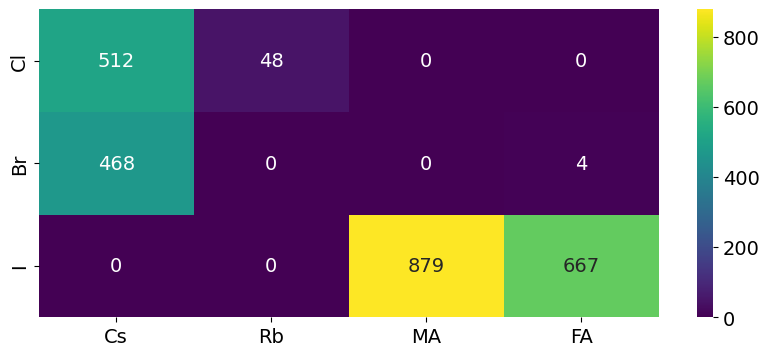

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pairs = [
    ('Cs', 'Cl'), ('Cs', 'Br'), ('Cs', 'I'),
    ('Rb', 'Cl'), ('Rb', 'Br'), ('Rb', 'I'),
    ('MA', 'Cl'), ('MA', 'Br'), ('MA', 'I'),
    ('FA', 'Cl'), ('FA', 'Br'), ('FA', 'I')
]


pair_counts = {}


for cation, anion in pairs:

    count = data_scr3[(data_scr3[cation] == 1) & (data_scr3[anion] == 1)].shape[0]
    pair_counts[(cation, anion)] = count

heatmap_matrix = np.array([
    [pair_counts[('Cs', 'Cl')], pair_counts[('Rb', 'Cl')], pair_counts[('MA', 'Cl')], pair_counts[('FA', 'Cl')]],
    [pair_counts[('Cs', 'Br')], pair_counts[('Rb', 'Br')], pair_counts[('MA', 'Br')], pair_counts[('FA', 'Br')]],
    [pair_counts[('Cs', 'I')], pair_counts[('Rb', 'I')], pair_counts[('MA', 'I')], pair_counts[('FA', 'I')]]
])

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(heatmap_matrix, annot=True, cmap='viridis', fmt='d',
            yticklabels=['Cl', 'Br', 'I'], xticklabels=['Cs', 'Rb', 'MA', 'FA'])
#ax.set_title('Heatmap of Perovskite Structures with Cs, Rb, MA, FA and Cl, Br, I')
plt.show()


In [18]:
def mixing_identifier(df):
    A_site = ['K', 'Rb', 'Cs', 'MA', 'FA']
    B_site = ['Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb']
    X_site = ['Cl', 'Br', 'I']

    df_inorganic = df[(df['MA'] == 0) & (df['FA'] == 0)]
    df_hybrid = df[(df['MA'] != 0) | (df['FA'] != 0)]
    #print("Hybrid", df_hybrid)

    inorganic_pure = []
    inorganic_A_mix = []
    inorganic_B_mix = []
    inorganic_X_mix = []
    inorganic_A_B_mix = []
    inorganic_A_X_mix = []
    inorganic_B_X_mix = []




    for i in range(len(df_inorganic)):
        row = df_inorganic.iloc[i]
        values_A = [row[col] for col in A_site]
        values_B = [row[col] for col in B_site]
        values_X = [row[col] for col in X_site]

        nonzero_counts_A = sum(1 for value in values_A if value > 0)
        nonzero_counts_B = sum(1 for value in values_B if value > 0)
        nonzero_counts_X = sum(1 for value in values_X if value > 0)

        if nonzero_counts_A == 1 and nonzero_counts_B == 1 and nonzero_counts_X == 1 :
            inorganic_pure.append(row)

        if nonzero_counts_A > 1 and nonzero_counts_B == 1 and nonzero_counts_X == 1 :
            inorganic_A_mix.append(row)

        if nonzero_counts_A == 1 and nonzero_counts_B > 1 and nonzero_counts_X == 1 :
            inorganic_B_mix.append(row)

        if nonzero_counts_A == 1 and nonzero_counts_B == 1 and nonzero_counts_X > 1 :
            inorganic_X_mix.append(row)

        if nonzero_counts_A > 1 and nonzero_counts_B > 1 and nonzero_counts_X == 1 :
            inorganic_A_B_mix.append(row)

        if nonzero_counts_A > 1 and nonzero_counts_B == 1 and nonzero_counts_X > 1 :
            inorganic_A_X_mix.append(row)

        if nonzero_counts_A == 1 and nonzero_counts_B > 1 and nonzero_counts_X > 1 :
            inorganic_B_X_mix.append(row)

    df_inorganic_pure = pd.DataFrame(inorganic_pure).reset_index(drop=True)
    df_inorganic_A_mix = pd.DataFrame(inorganic_A_mix).reset_index(drop=True)
    df_inorganic_B_mix = pd.DataFrame(inorganic_B_mix).reset_index(drop=True)
    df_inorganic_X_mix = pd.DataFrame(inorganic_X_mix).reset_index(drop=True)
    df_inorganic_A_B_mix = pd.DataFrame(inorganic_A_B_mix).reset_index(drop=True)
    df_inorganic_A_X_mix = pd.DataFrame(inorganic_A_X_mix).reset_index(drop=True)
    df_inorganic_B_X_mix = pd.DataFrame(inorganic_B_X_mix).reset_index(drop=True)

    hybrid_pure = []
    hybrid_A_mix = []
    hybrid_B_mix = []
    hybrid_X_mix = []
    hybrid_A_B_mix = []
    hybrid_A_X_mix = []
    hybrid_B_X_mix = []


    for j in range(len(df_hybrid)):
        row_org = df_hybrid.iloc[j]
        values_A_org = [row_org[col] for col in A_site]
        values_B_org = [row_org[col] for col in B_site]
        values_X_org = [row_org[col] for col in X_site]

        nonzero_counts_A_org = sum(1 for value in values_A_org if value > 0)
        nonzero_counts_B_org = sum(1 for value in values_B_org if value > 0)
        nonzero_counts_X_org = sum(1 for value in values_X_org if value > 0)

        if nonzero_counts_A_org == 1 and nonzero_counts_B_org == 1 and nonzero_counts_X_org == 1 :
            hybrid_pure.append(row_org)

        if nonzero_counts_A_org > 1 and nonzero_counts_B_org == 1 and nonzero_counts_X_org == 1 :
            hybrid_A_mix.append(row_org)

        if nonzero_counts_A_org == 1 and nonzero_counts_B_org > 1 and nonzero_counts_X_org == 1 :
            hybrid_B_mix.append(row_org)

        if nonzero_counts_A_org == 1 and nonzero_counts_B_org == 1 and nonzero_counts_X_org > 1 :
            hybrid_X_mix.append(row_org)

        if nonzero_counts_A_org > 1 and nonzero_counts_B_org > 1 and nonzero_counts_X_org == 1 :
            hybrid_A_B_mix.append(row_org)

        if nonzero_counts_A_org > 1 and nonzero_counts_B_org == 1 and nonzero_counts_X_org > 1 :
            hybrid_A_X_mix.append(row_org)

        if nonzero_counts_A_org == 1 and nonzero_counts_B_org > 1 and nonzero_counts_X_org > 1 :
            hybrid_B_X_mix.append(row_org)

    df_hybrid_pure = pd.DataFrame(hybrid_pure).reset_index(drop=True)
    df_hybrid_A_mix = pd.DataFrame(hybrid_A_mix).reset_index(drop=True)
    df_hybrid_B_mix = pd.DataFrame(hybrid_B_mix).reset_index(drop=True)
    df_hybrid_X_mix = pd.DataFrame(hybrid_X_mix).reset_index(drop=True)
    df_hybrid_A_B_mix = pd.DataFrame(hybrid_A_B_mix).reset_index(drop=True)
    df_hybrid_A_X_mix = pd.DataFrame(hybrid_A_X_mix).reset_index(drop=True)
    df_hybrid_B_X_mix = pd.DataFrame(hybrid_B_X_mix).reset_index(drop=True)

    return df_inorganic_pure, df_inorganic_A_mix, df_inorganic_B_mix, df_inorganic_X_mix, df_inorganic_A_B_mix, df_inorganic_A_X_mix, df_inorganic_B_X_mix, df_hybrid_pure, df_hybrid_A_mix, df_hybrid_B_mix, df_hybrid_X_mix, df_hybrid_A_B_mix, df_hybrid_A_X_mix, df_hybrid_B_X_mix


In [19]:
df_inorganic_pure, df_inorganic_A_mix, df_inorganic_B_mix, df_inorganic_X_mix, df_inorganic_A_B_mix, df_inorganic_A_X_mix, df_inorganic_B_X_mix, df_hybrid_pure, df_hybrid_A_mix, df_hybrid_B_mix, df_hybrid_X_mix, df_hybrid_A_B_mix, df_hybrid_A_X_mix, df_hybrid_B_X_mix = mixing_identifier(data_scr3)
df_hybrid_B_X_mix

""


In [20]:
df_inorganic_pure

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Expt,Decomp(PBE),Decomp(HSE),Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM
0,49895,49895,18255,CsGeCl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.441294,-0.266644,2.460543,2.18267,4.571175,8.290922,5.635920,-0.034351,2.426192
1,50021,50021,18381,CsGeBr3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.304931,-0.313324,1.872411,2.18267,4.571175,7.589259,5.344693,-0.031512,1.840899
2,66874,66874,22889,CsGeCl3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.489215,-0.323616,2.658454,2.18267,4.571175,8.290922,5.635920,-0.133306,2.525147
3,67000,67000,23015,CsGeBr3,0.0,0.0,1.0,0.0,0.0,0.0,...,0,-0.342444,-0.352631,2.052969,2.18267,4.571175,7.589259,5.344693,-0.121791,1.931178


In [21]:
from google.colab import files
df_inorganic_pure.to_csv('df_inorganic_pure.csv')
files.download('df_inorganic_pure.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

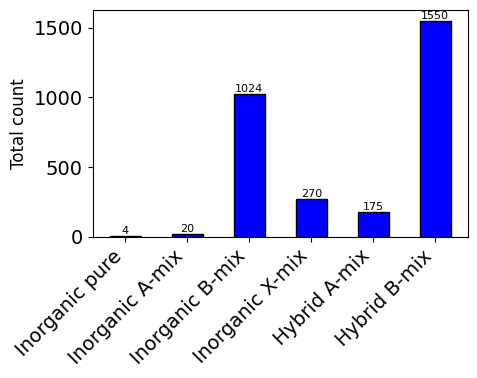

In [22]:
import matplotlib.pyplot as plt

# Assuming the lengths dictionary is already defined with your data
lengths = {
    'Inorganic pure': len(df_inorganic_pure),
    'Inorganic A-mix': len(df_inorganic_A_mix),
    'Inorganic B-mix': len(df_inorganic_B_mix),
    'Inorganic X-mix': len(df_inorganic_X_mix),
    'inorganic_A_B_mix': len(df_inorganic_A_B_mix),
    'inorganic_A_X_mix': len(df_inorganic_A_X_mix),
    'inorganic_B_X_mix': len(df_inorganic_B_X_mix),
    'Hybrid_pure': len(df_hybrid_pure),
    'Hybrid A-mix': len(df_hybrid_A_mix),
    'Hybrid B-mix': len(df_hybrid_B_mix),
    'Hybrid X-mix': len(df_hybrid_X_mix),
    'hybrid_A_B_mix': len(df_hybrid_A_B_mix),
    'hybrid_A_X_mix': len(df_hybrid_A_X_mix),
    'hybrid_B_X_mix': len(df_hybrid_B_X_mix)
}

# Filter out entries with zero length
filtered_lengths = {key: value for key, value in lengths.items() if value > 0}

# Check if the filtered dictionary is not empty
if filtered_lengths:
    # Extract keys and values for the bar chart
    labels = list(filtered_lengths.keys())
    values = list(filtered_lengths.values())

    # Set all fonts to sans-serif
    plt.rcParams.update({'font.family': 'sans-serif'})

    # Create the bar chart with specified figsize
    plt.figure(figsize=(5, 4))  # Adjust figsize as needed
    bars = plt.bar(labels, values, color='blue', edgecolor='black', width=0.5)

    # Adding labels and title
    plt.ylabel('Total count', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Adding the value on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=8)

    # Add grid for better readability
    #plt.grid(axis='y', linestyle='--', alpha=1)

    # Adjust layout to make room for x-axis labels
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("All DataFrames have zero length or are empty.")


In [23]:
ref_data = pd.read_csv('/content/drive/My Drive/Water_split/Data_AM.csv')
ref_data

,Wavelength,Global
0,280.0,4.730000e-23
1,280.5,1.230000e-21
2,281.0,5.690000e-21
3,281.5,1.570000e-19
4,282.0,1.190000e-18
...,...,...
1997,3980.0,7.390000e-03
1998,3985.0,7.430000e-03
1999,3990.0,7.370000e-03
2000,3995.0,7.210000e-03


In [24]:
h = 6.62607004081E-34
c = 299792458

ref_data['Energy(eV)'] = None
ref_data['P(hw)'] = None
ref_data['P(hw)/hw'] = None

for i in range(0, len(ref_data.index)):
  ref_data.loc[i, 'Energy(eV)'] = 1239.84193/ref_data.loc[i, 'Wavelength']
  ref_data.loc[i, 'P(hw)'] = ((ref_data.loc[i, 'Global'] * ref_data.loc[i, 'Wavelength'])/(h*c)) * (10**(-15))
  ref_data.loc[i, 'P(hw)/hw'] = ref_data.loc[i, 'P(hw)']/ref_data.loc[i, 'Energy(eV)']
ref_data

,Wavelength,Global,Energy(eV),P(hw),P(hw)/hw
0,280.0,4.730000e-23,4.428007,0.0,0.0
1,280.5,1.230000e-21,4.420114,0.0,0.0
2,281.0,5.690000e-21,4.412249,0.0,0.0
3,281.5,1.570000e-19,4.404412,0.0,0.0
4,282.0,1.190000e-18,4.396603,0.000002,0.0
...,...,...,...,...,...
1997,3980.0,7.390000e-03,0.311518,148064445747.811127,475299697338.263367
1998,3985.0,7.430000e-03,0.311127,149052894552.136627,479073799988.571472
1999,3990.0,7.370000e-03,0.310737,148034744459.573181,476398334418.079407
2000,3995.0,7.210000e-03,0.310348,145002444295.14502,467224692876.05426


In [25]:
ref_data = ref_data[::-1]
ref_data = ref_data.reset_index(drop=True)
ref_data

,Wavelength,Global,Energy(eV),P(hw),P(hw)/hw
0,4000.0,7.100000e-03,0.30996,142968912874.175903,461248839597.402222
1,3995.0,7.210000e-03,0.310348,145002444295.14502,467224692876.05426
2,3990.0,7.370000e-03,0.310737,148034744459.573181,476398334418.079407
3,3985.0,7.430000e-03,0.311127,149052894552.136627,479073799988.571472
4,3980.0,7.390000e-03,0.311518,148064445747.811127,475299697338.263367
...,...,...,...,...,...
1997,282.0,1.190000e-18,4.396603,0.000002,0.0
1998,281.5,1.570000e-19,4.404412,0.0,0.0
1999,281.0,5.690000e-21,4.412249,0.0,0.0
2000,280.5,1.230000e-21,4.420114,0.0,0.0


In [26]:
from scipy.integrate import simps

def E_over(Eg, CBM, VBM):
  HER = np.abs(CBM)
  OER=  np.abs(VBM - 1.23)

  if (HER >= 0.2) and (OER >= 0.6):
    E = Eg

  if (HER < 0.2) and (OER >= 0.6):
    E = Eg + 0.2 - HER

  if (HER >= 0.2) and (OER < 0.6):
    E = Eg + 0.6 - OER

  if (HER < 0.2) and (OER < 0.6):
    E = Eg + 0.8 - HER - OER

  return E

def n_abs(ref_data, Eg):
  solar_data = ref_data[ref_data['Energy(eV)'] >= Eg]
  num = simps(solar_data['P(hw)'], solar_data['Energy(eV)'])
  denm = simps(ref_data['P(hw)'], ref_data['Energy(eV)'])

  abs_n = num/denm

  return abs_n



def n_cu(ref_data, Eg, CBM, VBM):
  solar_data = ref_data[ref_data['Energy(eV)'] >= Eg]

  gap = E_over(Eg, CBM, VBM)

  E_data = ref_data[ref_data['Energy(eV)'] >= gap]

  G = 1.23
  num = G*(simps(E_data['P(hw)/hw'], E_data['Energy(eV)']))
  denm = simps(solar_data['P(hw)'], solar_data['Energy(eV)'])

  abs_cu = num/denm

  return abs_cu




data_scr3['n_abs(%)'] = None
data_scr3['n_cu(%)'] = None


In [27]:
for i in range(0, len(data_scr3.index)):
  data_scr3.loc[i, 'n_abs(%)'] = n_abs(ref_data= ref_data, Eg= data_scr3.loc[i, 'Band gap(HSE-mf1)'])*100
  data_scr3.loc[i, 'n_cu(%)'] = n_cu(ref_data= ref_data, Eg= data_scr3.loc[i, 'Band gap(HSE-mf1)'], CBM= data_scr3.loc[i, 'CBM'], VBM= data_scr3.loc[i, 'VBM'])*100

data_scr3


,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Decomp(HSE),Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%)
0,62,62,60,RbCa0.125Ge0.625Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0.085150,2.497572,2.331397,3.922525,8.290922,5.538576,-0.150210,2.347362,29.414255,38.41579
1,64,64,62,RbCa0.125Ge0.625Pb0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0.081897,2.625616,2.331397,3.919830,8.290922,5.537814,-0.214993,2.410622,24.041885,40.656097
2,67,67,65,RbCa0.125Ge0.750Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0.057796,2.541526,2.331397,3.956520,8.290922,5.548143,-0.162620,2.378906,27.42354,38.825985
3,72,72,69,RbCa0.250Ge0.500Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,0.056482,2.501911,2.331397,3.922369,8.290922,5.538532,-0.152424,2.349487,29.16948,38.738155
4,74,74,70,RbCa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,0.032649,2.431663,2.331397,3.919726,8.290922,5.537785,-0.118046,2.313616,32.165133,37.361511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.101726,2.713299,2.182670,3.902574,8.290922,5.460464,-0.336186,2.377113,20.319139,39.672628
3039,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.103025,2.698493,2.182670,3.941906,8.290922,5.471426,-0.317820,2.380673,21.022754,39.867288
3040,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.089858,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326,34.408719,43.212604
3041,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.115070,2.414528,2.182670,3.975901,7.589259,5.197618,-0.449646,1.964881,33.022741,42.880906


In [28]:
data_scr3['n_abs(%)'] = pd.to_numeric(data_scr3['n_abs(%)'])
data_scr3['n_abs(%)'] = data_scr3['n_abs(%)'].round(2)

data_scr3['n_cu(%)'] = pd.to_numeric(data_scr3['n_cu(%)'])
data_scr3['n_cu(%)'] = data_scr3['n_cu(%)'].round(2)
data_scr3

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Decomp(HSE),Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%)
0,62,62,60,RbCa0.125Ge0.625Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0.085150,2.497572,2.331397,3.922525,8.290922,5.538576,-0.150210,2.347362,29.41,38.42
1,64,64,62,RbCa0.125Ge0.625Pb0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0.081897,2.625616,2.331397,3.919830,8.290922,5.537814,-0.214993,2.410622,24.04,40.66
2,67,67,65,RbCa0.125Ge0.750Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,0.057796,2.541526,2.331397,3.956520,8.290922,5.548143,-0.162620,2.378906,27.42,38.83
3,72,72,69,RbCa0.250Ge0.500Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,0.056482,2.501911,2.331397,3.922369,8.290922,5.538532,-0.152424,2.349487,29.17,38.74
4,74,74,70,RbCa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,0.032649,2.431663,2.331397,3.919726,8.290922,5.537785,-0.118046,2.313616,32.17,37.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.101726,2.713299,2.182670,3.902574,8.290922,5.460464,-0.336186,2.377113,20.32,39.67
3039,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.103025,2.698493,2.182670,3.941906,8.290922,5.471426,-0.317820,2.380673,21.02,39.87
3040,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.089858,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326,34.41,43.21
3041,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,-0.115070,2.414528,2.182670,3.975901,7.589259,5.197618,-0.449646,1.964881,33.02,42.88


In [29]:
data_scr3['n_STH(%)'] = None
for i in range(0, len(data_scr3.index)):
  data_scr3.loc[i, 'n_STH(%)'] = (data_scr3.loc[i, 'n_abs(%)'] * data_scr3.loc[i, 'n_cu(%)'])/100

data_scr3

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%),n_STH(%)
0,62,62,60,RbCa0.125Ge0.625Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.497572,2.331397,3.922525,8.290922,5.538576,-0.150210,2.347362,29.41,38.42,11.299322
1,64,64,62,RbCa0.125Ge0.625Pb0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.625616,2.331397,3.919830,8.290922,5.537814,-0.214993,2.410622,24.04,40.66,9.774664
2,67,67,65,RbCa0.125Ge0.750Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.541526,2.331397,3.956520,8.290922,5.548143,-0.162620,2.378906,27.42,38.83,10.647186
3,72,72,69,RbCa0.250Ge0.500Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.501911,2.331397,3.922369,8.290922,5.538532,-0.152424,2.349487,29.17,38.74,11.300458
4,74,74,70,RbCa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.431663,2.331397,3.919726,8.290922,5.537785,-0.118046,2.313616,32.17,37.36,12.018712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.713299,2.182670,3.902574,8.290922,5.460464,-0.336186,2.377113,20.32,39.67,8.060944
3039,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.698493,2.182670,3.941906,8.290922,5.471426,-0.317820,2.380673,21.02,39.87,8.380674
3040,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326,34.41,43.21,14.868561
3041,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.414528,2.182670,3.975901,7.589259,5.197618,-0.449646,1.964881,33.02,42.88,14.158976


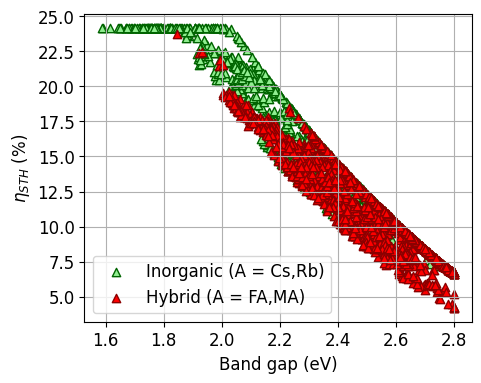

In [30]:
rows_org = []
rows_inorg = []
for i in range(0, len(data_scr3.index)):
  if (data_scr3.loc[i, 'Cs'] == 1 or data_scr3.loc[i, 'Rb'] == 1) and (data_scr3.loc[i, 'MA'] == 0 and data_scr3.loc[i, 'FA'] == 0):
    rows_inorg.append(i)

  else:
    rows_org.append(i)

inorg = data_scr3.iloc[rows_inorg]
org = data_scr3.iloc[rows_org]

plt.figure(figsize=(5, 4))
plt.rc('font', family='sans-serif', size=12)
plt.scatter(inorg['Band gap(HSE-mf1)'], inorg['n_STH(%)'], marker='^', color='lightgreen', edgecolor='darkgreen', label='Inorganic (A = Cs,Rb)')
plt.scatter(org['Band gap(HSE-mf1)'], org['n_STH(%)'], marker='^', color='red', edgecolor='darkred', label='Hybrid (A = FA,MA)')

plt.xlabel('Band gap (eV)')
plt.ylabel('$\eta$$_{STH}$ (%)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
sorted_data = data_scr3.sort_values(by='n_STH(%)', ascending=False)
sorted_data

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%),n_STH(%)
2897,67065,67065,23055,CsCa0.125Ge0.375Pb0.250Sn0.250Br3,0.00,0.0,1.00,0.00,0.00,0.13,...,1.820479,2.182670,4.139450,7.589259,5.239692,-0.110548,1.709931,61.90,39.07,24.18433
1160,33203,33203,12275,CsCa0.250Ge0.250Pb0.375Sn0.125Br3,0.00,0.0,1.00,0.00,0.00,0.25,...,1.820194,2.182670,3.846399,7.589259,5.163309,-0.186788,1.633406,61.90,39.07,24.18433
1114,33121,33121,12223,CsCa0.125Ge0.500Sn0.375Br3,0.00,0.0,1.00,0.00,0.00,0.13,...,1.733625,2.182670,4.178782,7.589259,5.249612,-0.057201,1.676424,66.24,36.51,24.184224
384,15905,15905,5591,CsGe0.625Pb0.250Sr0.125Br3,0.00,0.0,1.00,0.00,0.00,0.00,...,1.733995,2.182670,4.173600,7.589259,5.248309,-0.058688,1.675306,66.24,36.51,24.184224
2695,66812,66812,22834,CsGe0.500Pb0.125Sn0.250Sr0.125Br3,0.00,0.0,1.00,0.00,0.00,0.00,...,1.772443,2.182670,4.142248,7.589259,5.240400,-0.085822,1.686622,64.20,37.67,24.18414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,27157,27157,10029,FABa0.125Pb0.625Sr0.250Br3,0.00,0.0,0.00,0.00,1.00,0.00,...,2.779224,4.444730,3.459966,7.589259,5.827779,-0.001833,2.777391,17.99,24.81,4.463319
262,10142,10142,3760,FABa0.125Pb0.250Sn0.375Sr0.250Br3,0.00,0.0,0.00,0.00,1.00,0.00,...,2.799770,4.444730,3.467998,7.589259,5.830482,-0.009403,2.790367,17.09,25.13,4.294717
2586,65732,65732,22365,Cs0.375MA0.125Rb0.500GeCl3,0.00,0.5,0.38,0.13,0.00,0.00,...,2.797969,2.589831,4.571175,8.290922,5.832054,-0.006931,2.791039,17.32,24.79,4.293628
227,8627,8627,3409,FAGe0.250Pb0.250Sn0.125Sr0.375Br3,0.00,0.0,0.00,0.00,1.00,0.00,...,2.799030,4.444730,3.491059,7.589259,5.838216,-0.001300,2.797731,17.09,24.63,4.209267


In [48]:
from google.colab import files
sorted_data.to_csv('Pb_comps.csv')
files.download('Pb_comps.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
cols = []
for i in range(0, len(data_scr3.index)):
  if data_scr3.loc[i, 'Pb'] == 0 :
    cols.append(i)

data_scr4 = data_scr3.iloc[cols]
data_scr4 = data_scr4.reset_index(drop=True)
data_scr4

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%),n_STH(%)
0,62,62,60,RbCa0.125Ge0.625Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.497572,2.331397,3.922525,8.290922,5.538576,-0.150210,2.347362,29.41,38.42,11.299322
1,67,67,65,RbCa0.125Ge0.750Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.541526,2.331397,3.956520,8.290922,5.548143,-0.162620,2.378906,27.42,38.83,10.647186
2,72,72,69,RbCa0.250Ge0.500Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.501911,2.331397,3.922369,8.290922,5.538532,-0.152424,2.349487,29.17,38.74,11.300458
3,77,77,72,RbCa0.250Ge0.625Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.411409,2.331397,3.956416,8.290922,5.548114,-0.097591,2.313818,33.26,36.14,12.020164
4,79,79,74,RbCa0.250Ge0.750Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.527741,2.331397,3.990411,8.290922,5.557615,-0.146255,2.381486,28.08,37.92,10.647936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,67727,67727,23188,CsBa0.125Ca0.125Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.13,...,2.404548,2.182670,3.967506,7.589259,5.195421,-0.446853,1.957695,33.43,42.98,14.368214
1169,67731,67731,23190,CsBa0.125Ca0.125Ge0.750Br3,0.0,0.0,1.0,0.0,0.0,0.13,...,2.580637,2.182670,4.001449,7.589259,5.204280,-0.526038,2.054599,25.89,41.12,10.645968
1170,67845,67845,23193,CsBa0.250Ge0.375Sn0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.791072,2.182670,3.910554,8.290922,5.462695,-0.372841,2.418231,17.55,38.89,6.825195
1171,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326,34.41,43.21,14.868561


In [34]:
sorted_data_1 = data_scr4.sort_values(by='n_STH(%)', ascending=False)
sorted_data_1

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%),n_STH(%)
359,33121,33121,12223,CsCa0.125Ge0.500Sn0.375Br3,0.00,0.00,1.00,0.00,0.00,0.13,...,1.733625,2.182670,4.178782,7.589259,5.249612,-0.057201,1.676424,66.24,36.51,24.184224
134,16114,16114,5779,CsCa0.125Ge0.375Sn0.500Br3,0.00,0.00,1.00,0.00,0.00,0.13,...,1.770693,2.182670,4.144735,7.589259,5.241029,-0.084318,1.686376,64.30,37.61,24.18323
147,16174,16174,5826,CsCa0.125Ge0.875Br3,0.00,0.00,1.00,0.00,0.00,0.13,...,1.971156,2.182670,4.280767,7.589259,5.274989,-0.150589,1.820567,53.98,44.80,24.18304
114,15867,15867,5560,CsGe0.500Sn0.375Sr0.125Br3,0.00,0.00,1.00,0.00,0.00,0.00,...,1.713522,2.182670,4.144891,7.589259,5.241069,-0.055692,1.657829,67.10,36.04,24.18284
682,50673,50673,18519,CsBa0.125Ge0.500Sn0.375Br3,0.00,0.00,1.00,0.00,0.00,0.00,...,1.859001,2.182670,4.189872,7.589259,5.252395,-0.117106,1.741895,59.71,40.50,24.18255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,57692,57692,19796,FA0.375K0.375Rb0.250GeBr3,0.38,0.25,0.00,0.00,0.38,0.00,...,2.798579,3.157432,4.571175,7.589259,5.754293,-0.084996,2.713583,17.32,30.09,5.211588
103,15568,15568,5372,Cs0.500FA0.500GeBr3,0.00,0.00,0.50,0.00,0.50,0.00,...,2.746470,3.313726,4.571175,7.589259,5.810165,-0.003070,2.743401,19.14,25.45,4.87113
100,15235,15235,5202,Cs0.375FA0.500Rb0.125GeBr3,0.00,0.13,0.38,0.00,0.50,0.00,...,2.793693,3.332278,4.571175,7.589259,5.816656,-0.020190,2.773503,17.32,25.77,4.463364
896,65732,65732,22365,Cs0.375MA0.125Rb0.500GeCl3,0.00,0.50,0.38,0.13,0.00,0.00,...,2.797969,2.589831,4.571175,8.290922,5.832054,-0.006931,2.791039,17.32,24.79,4.293628


In [49]:
from google.colab import files
sorted_data_1.to_csv('sorted_Pb-free_comps.csv')
files.download('sorted_Pb-free_comps.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

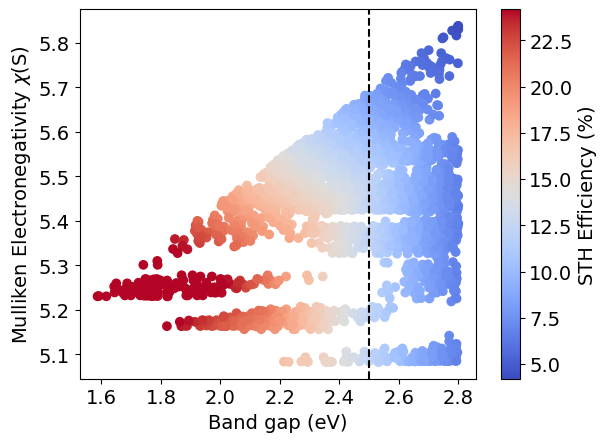

In [36]:
plt.rc('font', family='sans-serif', size=12)
scatter = plt.scatter(data_scr3['Band gap(HSE-mf1)'], data_scr3['x(S)'], c=data_scr3['n_STH(%)'], cmap='coolwarm')
cbar = plt.colorbar(scatter, label='STH Efficiency (%)')
cbar.set_label('STH Efficiency (%)', size=14)  # Setting the font size of the colorbar label
cbar.ax.tick_params(labelsize=14)  # Setting the font size of the colorbar ticks

plt.xlabel('Band gap (eV)', fontsize=14)
plt.ylabel('Mulliken Electronegativity $\chi$(S)', fontsize=14)

#plt.axhline(y=5.12, color='k', linestyle='--')  # Horizontal line at y = 5.08
#plt.axhline(y=5.6, color='k', linestyle='--')   # Horizontal line at y = 5.6
plt.axvline(x=2.5, color='k', linestyle='--')   # Vertical line at x = 2.3

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [37]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from matplotlib.font_manager import FontProperties

# # Load the Arial Narrow font
# font_path = '/content/arialnarrow.ttf'
# arial_narrow = FontProperties(fname=font_path)

# # Create the scatter plot
# plt.figure(figsize=(7, 5))
# scatter = plt.scatter(data_scr3['Band gap(HSE-mf1)'], data_scr3['x(S)'], c=data_scr3['n_STH(%)'], cmap='coolwarm')

# # Adding color bar
# cbar = plt.colorbar(scatter, label='STH Efficiency (%)')
# cbar.set_label('STH Efficiency (%)', size=18, fontproperties=arial_narrow)  # Setting the font size of the colorbar label
# cbar.ax.tick_params(labelsize=18)  # Setting the font size of the colorbar ticks

# # Apply Arial Narrow font to colorbar ticks
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(arial_narrow)
#     label.set_fontsize(18)

# # Adding labels and titles
# plt.xlabel('Band gap (eV)', fontsize=18, fontproperties=arial_narrow)
# plt.ylabel('Mulliken Electronegativity $\chi$(S)', fontsize=18, fontproperties=arial_narrow)

# # Adding a vertical line
# plt.axvline(x=2.5, color='k', linestyle='--')   # Vertical line at x = 2.5

# x_ticks = np.arange(1.5, 3.0, 0.2)
# y_ticks = np.arange(5.0, 6.0, 0.2)


# # Setting font size and font properties for ticks
# plt.xticks(x_ticks, fontsize=50, fontproperties=arial_narrow)
# plt.yticks(y_ticks, fontsize=50, fontproperties=arial_narrow)


# # Display the plot
# plt.show()


In [38]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from matplotlib.font_manager import FontProperties

# # Load the Arial Narrow font
# font_path = '/content/arialnarrow.ttf'
# arial_narrow = FontProperties(fname=font_path)

# # Example DataFrame (assuming data_scr3 is already defined)
# # data_scr3 = pd.read_csv('your_data.csv')

# # Create the scatter plot
# plt.figure(figsize=(7, 5))
# scatter = plt.scatter(data_scr3['Band gap(HSE-mf1)'], data_scr3['x(S)'], c=data_scr3['n_STH(%)'], cmap='coolwarm')

# # Adding color bar
# cbar = plt.colorbar(scatter, label='STH Efficiency (%)')
# cbar.set_label('STH Efficiency (%)', size=18, fontproperties=arial_narrow)  # Setting the font size of the colorbar label
# cbar.ax.tick_params(labelsize=18)  # Setting the font size of the colorbar ticks

# # Apply Arial Narrow font to colorbar ticks
# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(arial_narrow)
#     label.set_fontsize(18)

# # Adding labels and titles
# plt.xlabel('Band gap (eV)', fontsize=18, fontproperties=arial_narrow)
# plt.ylabel('Mulliken Electronegativity $\chi$(S)', fontsize=18, fontproperties=arial_narrow)

# # Adding a vertical line
# plt.axvline(x=2.5, color='k', linestyle='--')   # Vertical line at x = 2.5

# # Set specific x and y ticks
# x_ticks = np.arange(1.5, 3.0, 0.2)
# y_ticks = np.arange(5.0, 6.0, 0.2)

# # Apply Arial Narrow font and increase font size for x and y ticks directly
# ax = plt.gca()  # Get the current axis

# # Setting the ticks and their properties
# ax.set_xticks(x_ticks)
# ax.set_yticks(y_ticks)

# # Update tick labels for both x and y axis
# for label in ax.get_xticklabels():
#     label.set_fontproperties(arial_narrow)
#     label.set_fontsize(18)

# for label in ax.get_yticklabels():
#     label.set_fontproperties(arial_narrow)
#     label.set_fontsize(18)

# # Ensure everything fits in the plot
# plt.tight_layout()

# # Display the plot
# plt.show()


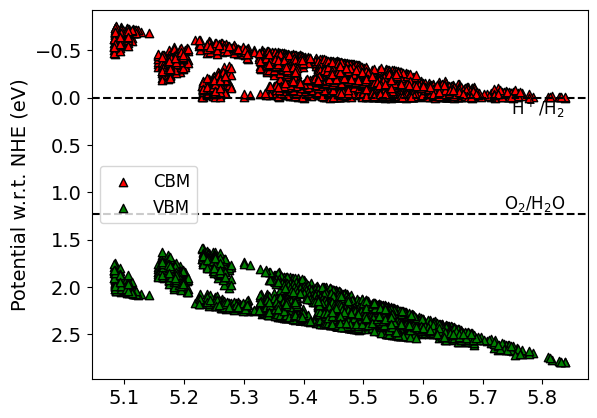

In [39]:
# Create scatter plots
plt.scatter(data_scr3['x(S)'], data_scr3['CBM'], color='red', marker='^', label='CBM', edgecolors='black')
plt.scatter(data_scr3['x(S)'], data_scr3['VBM'], color='green', marker='^', label='VBM', edgecolors='black')

# Add horizontal dashed lines
plt.axhline(y=0, color='k', linestyle='--')
plt.text(max(data_scr3['x(S)']), 0, 'H$^+$/H$_2$', verticalalignment='top', horizontalalignment='right')

plt.axhline(y=1.23, color='k', linestyle='--')
plt.text(max(data_scr3['x(S)']), 1.23, 'O$_2$/H$_2$O', verticalalignment='bottom', horizontalalignment='right')


# Fill area below y = 0 with very light red, and above y = 1.23 with very light green
# x_fill = np.linspace(min(data_scr3['x(S)']), max(data_scr3['x(S)']), 500)
# plt.fill_between(x_fill, min(data_scr3[['CBM', 'VBM']].min())-0.1, 0, color='lightcoral', alpha=0.3)
# plt.fill_between(x_fill, 1.23, max(data_scr3[['CBM', 'VBM']].max())+0.1, color='lightgreen', alpha=0.3)

#plt.xlabel('Mulliken Electronegativity $\chi$(S)', fontsize=14)
plt.ylabel('Potential w.r.t. NHE (eV)', fontsize=14)
#plt.title('Band edge poitions', fontsize=14)
plt.xticks(fontsize=14)  # Setting the font size of the x-axis ticks
plt.yticks(fontsize=14)  # Setting the font size of the y-axis ticks
plt.legend(loc='center left')

plt.gca().invert_yaxis()

plt.show()


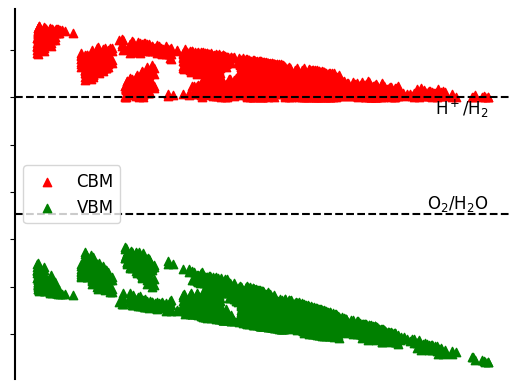

In [40]:
# Create scatter plots
plt.scatter(data_scr3['x(S)'], data_scr3['CBM'], color='red', marker='^', label='CBM')
plt.scatter(data_scr3['x(S)'], data_scr3['VBM'], color='green', marker='^', label='VBM')

# Add horizontal dashed lines
plt.axhline(y=0, color='k', linestyle='--')
plt.text(max(data_scr3['x(S)']), 0, 'H$^+$/H$_2$', verticalalignment='top', horizontalalignment='right')

plt.axhline(y=1.23, color='k', linestyle='--')
plt.text(max(data_scr3['x(S)']), 1.23, 'O$_2$/H$_2$O', verticalalignment='bottom', horizontalalignment='right')

# # Fill area below y = 0 with very light red, and above y = 1.23 with very light green
# x_fill = np.linspace(min(data_scr3['x(S)']), max(data_scr3['x(S)']), 500)
# plt.fill_between(x_fill, min(data_scr3[['CBM', 'VBM']].min())-0.1, 0, color='lightcoral', alpha=0.3)
# plt.fill_between(x_fill, 1.23, max(data_scr3[['CBM', 'VBM']].max())+0.1, color='lightgreen', alpha=0.3)

# Set labels and ticks
#plt.xlabel('Mulliken Electronegativity $\chi$(S)', fontsize=14)
#plt.ylabel('Potential w.r.t. NHE (eV)', fontsize=14)
plt.xticks(fontsize=14)  # Setting the font size of the x-axis ticks
plt.yticks(fontsize=14)  # Setting the font size of the y-axis ticks
plt.legend(loc='center left')

# Invert y-axis
plt.gca().invert_yaxis()

# Customize the axis spines to show only the left axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.show()

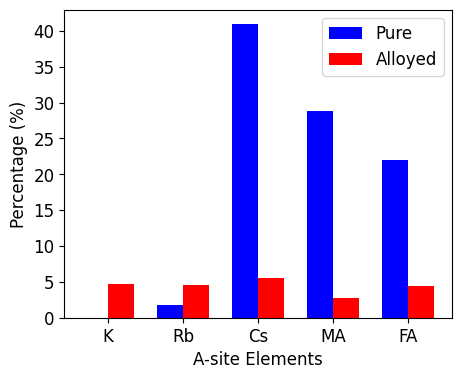

In [41]:
# Elements to consider
plt.rc('font', family='sans-serif', size=12)
elements = ['K', 'Rb', 'Cs', 'MA', 'FA']

# Initialize lists to store percentages
percentages_pure = []
percentages_mixed = []

for element in elements:
    count_pure = data_scr3[element].value_counts().get(1, 0)
    count_mixed = data_scr3[element].apply(lambda x: x != 0 and x != 1).sum()
    percentage_pure = (count_pure / len(data_scr3)) * 100
    percentage_mixed = (count_mixed / len(data_scr3)) * 100
    percentages_pure.append(percentage_pure)
    percentages_mixed.append(percentage_mixed)

# Plotting
x = np.arange(len(elements))

fig, ax1 = plt.subplots(figsize=(5, 4))

bar_width = 0.35
ax1.bar(x - bar_width/2, percentages_pure, width=bar_width, label='Pure', align='center', color='b')
ax1.bar(x + bar_width/2, percentages_mixed, width=bar_width, label='Alloyed', align='center', color='r')

ax1.set_xticks(x)
ax1.set_xticklabels(elements, fontsize=12)

ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.set_xlabel('A-site Elements', fontsize=12)

ax1.legend(fontsize=12)

plt.show()

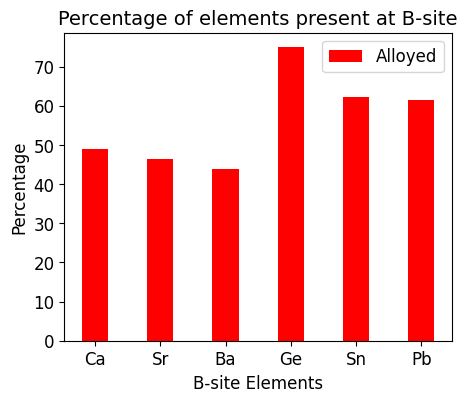

In [42]:
elements = ['Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb']
percentages_fractions = []
plt.rc('font', family='sans-serif', size=12)
# Calculate percentages for non-zero values (fractions)
for element in elements:
    count_fractions = len(data_scr3[data_scr3[element] != 0])
    percentage_fractions = (count_fractions / len(data_scr3)) * 100
    percentages_fractions.append(percentage_fractions)

# Plotting
x = np.arange(len(elements))
fig, ax = plt.subplots(figsize=(5,4))

ax.bar(x, percentages_fractions, width=0.4, color='red', label='Alloyed', align='center')
ax.set_xticks(x)
ax.set_xticklabels(elements, fontsize=12)
ax.tick_params(axis='y', labelsize=12)  # Adjust y-tick font size
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xlabel('B-site Elements', fontsize=12)
ax.set_title('Percentage of elements present at B-site', fontsize=14)
ax.legend(fontsize=12)



In [43]:
data_scr3

,Unnamed: 0.1,Unnamed: 0,Index,Formula,K,Rb,Cs,MA,FA,Ca,...,Band gap(HSE-mf1),A_En_mull,B_En_mull,X_En_mull,x(S),CBM,VBM,n_abs(%),n_cu(%),n_STH(%)
0,62,62,60,RbCa0.125Ge0.625Sn0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.497572,2.331397,3.922525,8.290922,5.538576,-0.150210,2.347362,29.41,38.42,11.299322
1,64,64,62,RbCa0.125Ge0.625Pb0.125Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.625616,2.331397,3.919830,8.290922,5.537814,-0.214993,2.410622,24.04,40.66,9.774664
2,67,67,65,RbCa0.125Ge0.750Sr0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.13,...,2.541526,2.331397,3.956520,8.290922,5.548143,-0.162620,2.378906,27.42,38.83,10.647186
3,72,72,69,RbCa0.250Ge0.500Sn0.250Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.501911,2.331397,3.922369,8.290922,5.538532,-0.152424,2.349487,29.17,38.74,11.300458
4,74,74,70,RbCa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,1.0,0.0,0.0,0.0,0.25,...,2.431663,2.331397,3.919726,8.290922,5.537785,-0.118046,2.313616,32.17,37.36,12.018712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,67849,67849,23196,CsBa0.250Ge0.375Pb0.375Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.713299,2.182670,3.902574,8.290922,5.460464,-0.336186,2.377113,20.32,39.67,8.060944
3039,67854,67854,23197,CsBa0.250Ge0.500Pb0.125Sn0.125Cl3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.698493,2.182670,3.941906,8.290922,5.471426,-0.317820,2.380673,21.02,39.87,8.380674
3040,67859,67859,23198,CsBa0.250Ge0.625Sn0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.382035,2.182670,3.978544,7.589259,5.198308,-0.432709,1.949326,34.41,43.21,14.868561
3041,67861,67861,23199,CsBa0.250Ge0.625Pb0.125Br3,0.0,0.0,1.0,0.0,0.0,0.00,...,2.414528,2.182670,3.975901,7.589259,5.197618,-0.449646,1.964881,33.02,42.88,14.158976


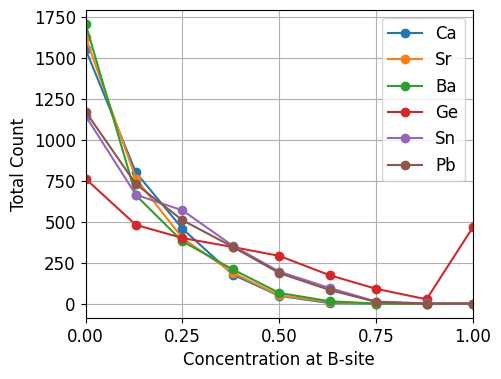

In [44]:
plt.rc('font', family='sans-serif', size=12)
x_values = np.unique(data_scr3[['Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb']].values.ravel())
aggregate_data = {
    element: [data_scr3[data_scr3[element] == x][element].count() for x in x_values]
    for element in ['Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb']
}

# Plotting
plt.figure(figsize=(5, 4))

for element, counts in aggregate_data.items():
    plt.plot(x_values, counts, '-o', label=element)


plt.xlabel('Concentration at B-site', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xlim(0.0, 0.875)
plt.xticks([0, 0.25, 0.5, 0.75, 1])
plt.legend()
plt.grid(True)
plt.show()

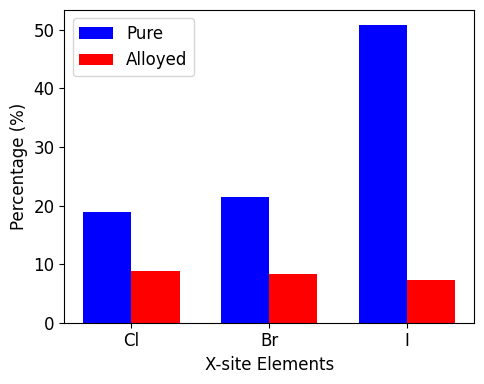

In [45]:
# Elements to consider
plt.rc('font', family='sans-serif', size=12)
elements = ['Cl', 'Br', 'I']

# Initialize lists to store percentages
percentages_pure = []
percentages_mixed = []

# Calculate percentages for pure and alloyed (mixed)
for element in elements:
    count_pure = data_scr3[element].value_counts().get(1, 0)
    count_mixed = data_scr3[element].apply(lambda x: x != 0 and x != 1).sum()
    percentage_pure = (count_pure / len(data_scr3)) * 100
    percentage_mixed = (count_mixed / len(data_scr3)) * 100
    percentages_pure.append(percentage_pure)
    percentages_mixed.append(percentage_mixed)

# Plotting
x = np.arange(len(elements))

fig, ax1 = plt.subplots(figsize=(5, 4))  # Increased figsize for better visibility

bar_width = 0.35
ax1.bar(x - bar_width/2, percentages_pure, width=bar_width, label='Pure', color='b', align='center')
ax1.bar(x + bar_width/2, percentages_mixed, width=bar_width, label='Alloyed', color='r', align='center')

# Setting ticks, labels, and title
ax1.set_xticks(x)
ax1.set_xticklabels(elements, fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.set_xlabel('X-site Elements', fontsize=12)
#ax1.set_title('Percentage of Halides at X-site', fontsize=14)  # Optional title
ax1.legend(fontsize=12)

# Adding grid for better readability
#ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

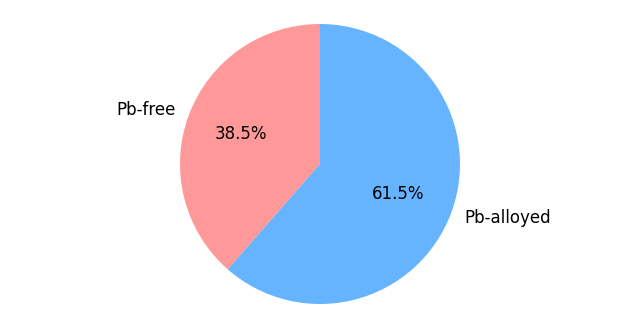

In [46]:
import matplotlib.pyplot as plt
plt.rc('font', family='sans-serif', size=12)
# Data
labels = ['Pb-free', 'Pb-alloyed']
sizes = [1173, 3043 - 1173]
colors = ['#ff9999','#66b3ff']

# Plot
plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.show()


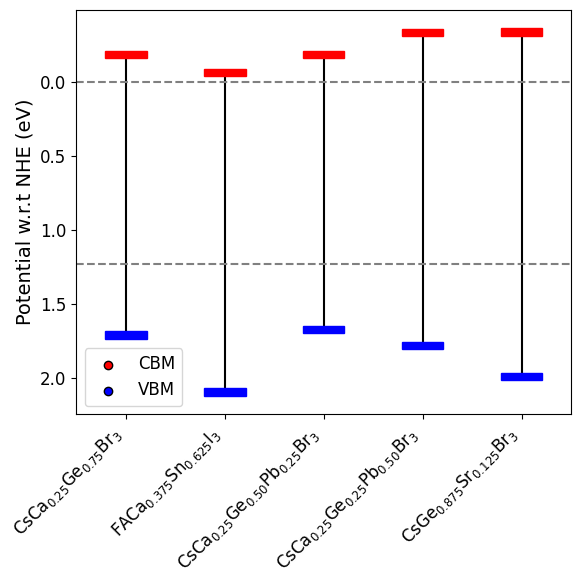

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Sample data
data = {
    'Compound': ['CsCa$_{0.25}$Ge$_{0.75}$Br$_3$', 'FACa$_{0.375}$Sn$_{0.625}$I$_3$', 'CsCa$_{0.25}$Ge$_{0.50}$Pb$_{0.25}$Br$_3$', 'CsCa$_{0.25}$Ge$_{0.25}$Pb$_{0.50}$Br$_3$', 'CsGe$_{0.875}$Sr$_{0.125}$Br$_3$'],
    'Phase': [1, 1, 1, 2, 3],
    'Eg (PBE)': [1.44, 1.76, 1.57, 1.92, 1.72],
    'Eg (HSE+SOC)': [1.9, 2.16, 1.86, 2.12, 2.33],
    'En': [5.201405885, 5.456774898, 5.182147695, 5.162598901, 5.266609607]
}
plt.rc('font', family='sans-serif', size=12)
# Create DataFrame
df = pd.DataFrame(data)

# Calculate CBM and VBM
df['CBM'] = df['En'] - 4.44 - df['Eg (HSE+SOC)'] / 2
df['VBM'] = df['Eg (HSE+SOC)'] + df['CBM']

# Plotting
plt.rc('font', family='sans-serif', size=12)
fig, ax = plt.subplots(figsize=(6, 6))

rect_width = 0.42  # Width of the rectangles
rect_height = 0.05  # Height of the rectangles

# Plot CBM and VBM with black line connecting them
for index, row in df.iterrows():
    # CBM rectangle
    cbm_rect = Rectangle((index - rect_width / 2, row['CBM'] - rect_height / 2), rect_width, rect_height, color='red', edgecolor='black', zorder=2)
    # VBM rectangle
    vbm_rect = Rectangle((index - rect_width / 2, row['VBM'] - rect_height / 2), rect_width, rect_height, color='blue', edgecolor='black', zorder=2)

    ax.add_patch(cbm_rect)
    ax.add_patch(vbm_rect)

    # Line connecting CBM and VBM
    ax.plot([index, index], [row['CBM'], row['VBM']], color='black', zorder=1)

    # Add labels for legend
    if index == 0:
        ax.scatter([], [], color='red', edgecolor='black', label='CBM')
        ax.scatter([], [], color='blue', edgecolor='black', label='VBM')

# Dotted horizontal lines at y=0 and y=1.23
ax.axhline(y=0, color='gray', linestyle='--')
ax.axhline(y=1.23, color='gray', linestyle='--')

# Invert y-axis
ax.invert_yaxis()

# Labels and title
ax.set_ylabel('Potential w.r.t NHE (eV)', fontsize=14)
#ax.set_xlabel('Compound', fontsize=14)
ax.legend()

# Adjust x-axis labels to make the compounds closer to each other
plt.xticks(ticks=np.arange(len(df)), labels=df['Compound'], rotation=45, ha='right')

# Adjust the limits of the x-axis to make the compounds closer
ax.set_xlim(-0.5, len(df) - 0.5)

plt.tight_layout()
plt.show()
